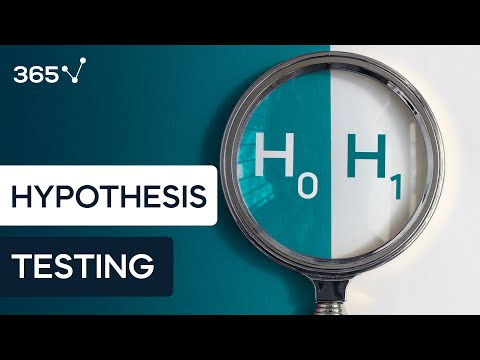

In [2]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

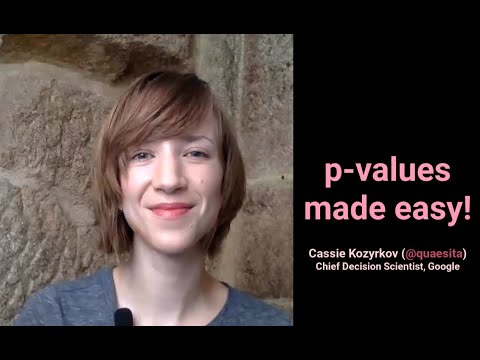

In [3]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

1) A measure for a good hypothesis/idea that can be tested statistically is if it is quantifiable and measureable. If it is both then data can be produced that can be anaylsed by us. A good null hypothesis should be specific and testable. It also should assume the status quo meaning that it assumes that whatever is happening has no impact. A null hypothesis shows that there is no difference in whatever is happening. An alternative hypothesis shows that there is a change or impact. 

2) The tests results that we get also help us learn about the population's average, μ, and allow us to compare to μ₀, the value that we are testing against. The sample mean, x̄, the average is the average sample in our test.

3) We assume that the null hypothesis is true as then we are looking at our data with the mindset that it has no effect on our outcome. This helps removes the bias of if we were to assume that our data was doing something.

4) The smaller the p-value gets the stronger the evidance against the null hypothesis is. Thus it would be ridiculous to not reject the null hypothesis and look towards the alternative hypothesis

In [1]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Simulation parameters
num_simulations = 10000  # Number of simulations
num_couples = 124  # Total number of couples
observed_right_tilts = 80  # Observed number of right tilts

# Simulate 10,000 trials of 124 "coin flips" (50% chance of tilting right or left)
simulated_tilts = np.random.binomial(num_couples, 0.5, num_simulations)

# Calculate how many simulations resulted in 80 or more right tilts
extreme_cases = np.sum(simulated_tilts >= observed_right_tilts)

# Calculate the p-value as the proportion of extreme outcomes
p_value = extreme_cases / num_simulations

# Output the p-value
print(f"P-value: {p_value}")

P-value: 0.001


5) The null hypothesis is that there is no preference for the couples tilting their heads. However in this simulation the p value is .001 giving us strong evidance to reject the null hypothesis

6) A smaller p-value does not prove that the null hypothesis is false. However it does give evidance aginst it. It is impossible to prove if Fido is innocent or guilty with only a P-value but we can give an arguement for one side. A p-value less than .001 gives extremely strong evidance to reject the null hypothesis while a p-value above .1 gives evidence to not reject the null hypothesis

Summary of ChatGPT chat:
https://chatgpt.com/share/670f1df4-2a50-8002-8916-0eeef880963d
Distinguishing between population and sample statistics: We clarified that statistical tests are used to make conclusions about a population (represented by μ, the population parameter), not just the sample (represented by x̄, the sample mean).

Interpreting p-values:

We explored the concept of "imagining a world where the null hypothesis is true" when calculating p-values, meaning we assume no effect or no difference exists.
A smaller p-value suggests that the null hypothesis (no effect) is less believable but does not prove it false.
Simulating a p-value: We simulated a p-value for a study on head tilt direction during kissing. Using a 50/50 "coin-flipping" model, we calculated the p-value to assess the likelihood of observing 80 out of 124 couples tilting their heads to the right.

Using p-values in decision-making:

We discussed that p-values do not definitively prove or disprove a hypothesis. For example, in the case of determining Fido’s innocence or guilt, a p-value can only indicate the strength of the evidence, not absolute proof.

7) For a one sided test we just focus on if the observed statistic is greater or less than our parameter. In this can we are focusing if the alternative hypothesis increases health scores. 

Observed Statistic: 0.8
One-sided p-value: 0.0565


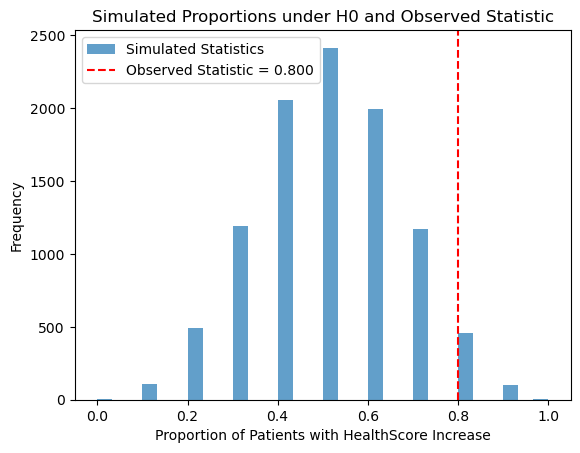

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Directly inputting the patient data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to a pandas DataFrame
patient_data = pd.DataFrame(data)

# Calculate the change in health score for each patient
patient_data['HealthScoreChange'] = patient_data['FinalHealthScore'] - patient_data['InitialHealthScore']

# Set random seed for reproducibility
np.random.seed(1)

# Define parameters for bootstrapping
number_of_simulations = 10000
n_size = len(patient_data)

# Initialize an array to store the simulated statistics
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# Bootstrapping: simulate random improvement proportions under H0 (no effect)
for i in range(number_of_simulations):
    random_improvement = np.random.choice([0, 1], size=n_size, replace=True)
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

# Hypothesized population parameter under H0
population_parameter_value_under_H0 = 0.5

# Observed statistic: proportion of patients with an increase in HealthScore
observed_statistic = (patient_data.HealthScoreChange > 0).mean()

# One-sided test: focus on whether the simulated statistics are greater than or equal to the observed statistic
SimStats_as_or_more_extreme_than_ObsStat = IncreaseProportionSimulations_underH0random >= observed_statistic

# Calculate the one-sided p-value (proportion of simulations that are as extreme or more extreme)
p_value = SimStats_as_or_more_extreme_than_ObsStat.mean()

print(f"Observed Statistic: {observed_statistic}")
print(f"One-sided p-value: {p_value}")

# Optional: visualize the simulated distribution
plt.hist(IncreaseProportionSimulations_underH0random, bins=30, alpha=0.7, label='Simulated Statistics')
plt.axvline(observed_statistic, color='red', linestyle='--', label=f'Observed Statistic = {observed_statistic:.3f}')
plt.title('Simulated Proportions under H0 and Observed Statistic')
plt.xlabel('Proportion of Patients with HealthScore Increase')
plt.ylabel('Frequency')
plt.legend()
plt.show()



We are only interested on one side of the distribution thus we only focus on the extremes in one direction making our p-value smaller.

Summary of ChatGPT
https://chatgpt.com/share/670f2041-8f24-8002-8f20-30b22a501e81
Vaccine Data Analysis Assignment:

You are working on an assignment analyzing the effectiveness of a new vaccine using health score data from patients.
Hypothesis Testing:

We discussed how to modify your hypothesis testing code from a two-sided (two-tailed) test to a one-sided (one-tailed) test, focusing on whether the vaccine increases health scores.
Code Adjustments:

I provided an updated version of your code that calculates a one-sided p-value instead of a two-sided p-value. This involved changing the way extreme values are determined in the simulated statistics.
Direct Data Input:

You provided the patient data directly, and I modified the code to use this data without requiring a CSV file.
Visualization:

The code includes a histogram to visualize the distribution of simulated statistics in relation to the observed statistic.

In this experiment we are testing to see if STA130 can taste to if milk or tea was poured into a cup first. Comparatively to the orginal experiment ran by Ronald Fisher this experiment had more people to sample. However the people any got two cups comapred to Fisher's eight cups of tea. The null hypothesis for this experiment is that students cannot taste the differnce for which one was poured first and will randomly guess. The alternative hypothesis is that the students can taste the difference.

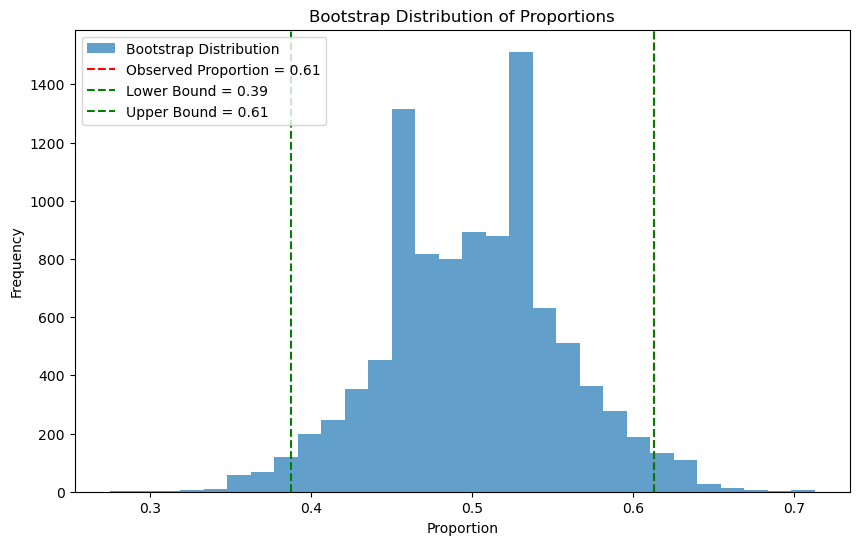

Observed Proportion: 0.6125
Null Hypothesis Proportion: 0.5
P-value (Bootstrap): 0.0294
95% Confidence Interval: (0.3875, 0.6125)
Conclusion: Reject the null hypothesis. There is evidence that the proportion of students who can correctly identify the order is greater than 0.5.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Observed proportion
observed_proportion = 49 / 80

# Bootstrapping
n_bootstraps = 10000
bootstrap_samples = np.random.binomial(n=80, p=0.5, size=n_bootstraps) / 80

# Calculate the p-value using bootstrapping
p_value_bootstrap = np.sum(bootstrap_samples >= observed_proportion) / n_bootstraps

# Calculate the confidence interval using bootstrapping
confidence_level = 0.95
lower_bound = np.percentile(bootstrap_samples, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(bootstrap_samples, (1 + confidence_level) / 2 * 100)
confidence_interval = (lower_bound, upper_bound)

# Explanation of the method
# Bootstrapping is a resampling method that involves repeatedly sampling from the observed data with replacement to create a distribution of the test statistic.
# In this case, we use bootstrapping to create a distribution of proportions under the null hypothesis that the true proportion is 0.5.
# The p-value represents the proportion of bootstrap samples that are at least as extreme as the observed proportion.
# The confidence interval provides a range of values within which we can be confident that the true proportion lies.

# Supporting Visualizations (if needed)
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_samples, bins=30, alpha=0.7, label='Bootstrap Distribution')
plt.axvline(observed_proportion, color='r', linestyle='--', label=f'Observed Proportion = {observed_proportion:.2f}')
plt.axvline(lower_bound, color='g', linestyle='--', label=f'Lower Bound = {lower_bound:.2f}')
plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound = {upper_bound:.2f}')
plt.title('Bootstrap Distribution of Proportions')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Findings and Discussion
print(f"Observed Proportion: {observed_proportion}")
print(f"Null Hypothesis Proportion: 0.5")
print(f"P-value (Bootstrap): {p_value_bootstrap}")
print(f"95% Confidence Interval: {confidence_interval}")

if p_value_bootstrap < 0.05:
    print("Conclusion: Reject the null hypothesis. There is evidence that the proportion of students who can correctly identify the order is greater than 0.5.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no evidence that the proportion of students who can correctly identify the order is greater than 0.5.")


There is evidence to reject the null hypothesis as the observed proportion falls at the outer boundaries of the confidence interval. This means that students did not randomly guess and could taste the difference inbetween milk and tea poured first. 

Copilot summary
Introduction to Fisher’s Tea Experiment: You provided an overview of Ronald Fisher’s famous tea experiment with Dr. Muriel Bristol, where she claimed she could taste the difference between tea poured first and milk poured first.
Statistical Analysis Request: You asked for a statistical analysis of a similar experiment with 80 STA130 students, where 49 correctly identified whether milk or tea was poured first.
Initial Analysis: I provided a detailed analysis using a one-sample z-test for proportions, including the null and alternative hypotheses, calculation of the z-score, p-value, and a conclusion based on the results.
Bootstrapping Method: You requested an analysis using bootstrapping. I provided the Python code to perform bootstrapping, calculate the p-value, and visualize the bootstrap distribution.
Confidence Interval: You asked for the inclusion of a confidence interval in the analysis. I provided the updated Python code to calculate the 95% confidence interval using bootstrapping and included the findings and visualization.
Summary: Finally, you requested a summary of our conversation, which I have provided here